# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining signal

In [2]:
A=0.5
w0=2*np.pi*0.05
N=100
sigma_v=0.5
n=np.arange(N)
phi = np.random.uniform(0,2*np.pi)
#desired signal
y=A*np.cos(w0*n + phi)
#noise process
v = np.random.normal(0, sigma_v, size=N)
#noise corrupted signals
x=y+v

# Original signal

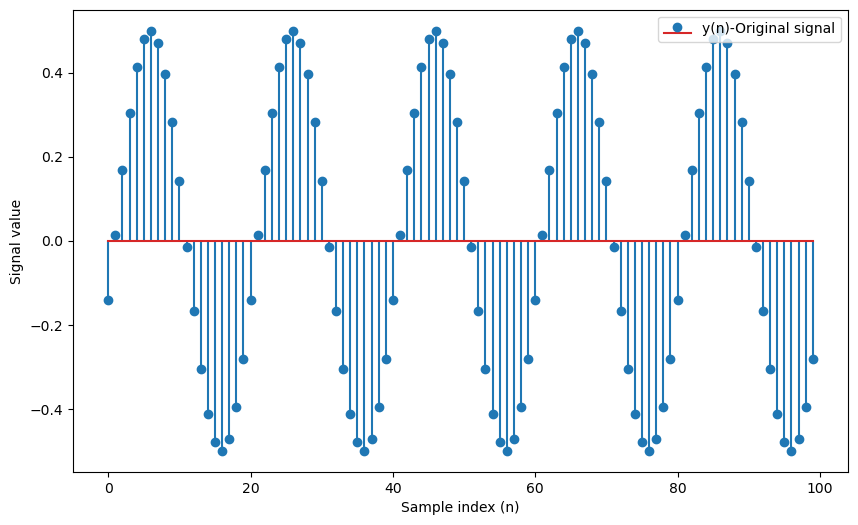

In [3]:
plt.figure(figsize=(10,6))
plt.stem(n, y, label='y(n)-Original signal')
plt.xlabel('Sample index (n)')
plt.ylabel('Signal value')
plt.legend()
plt.show()

# Noise signal

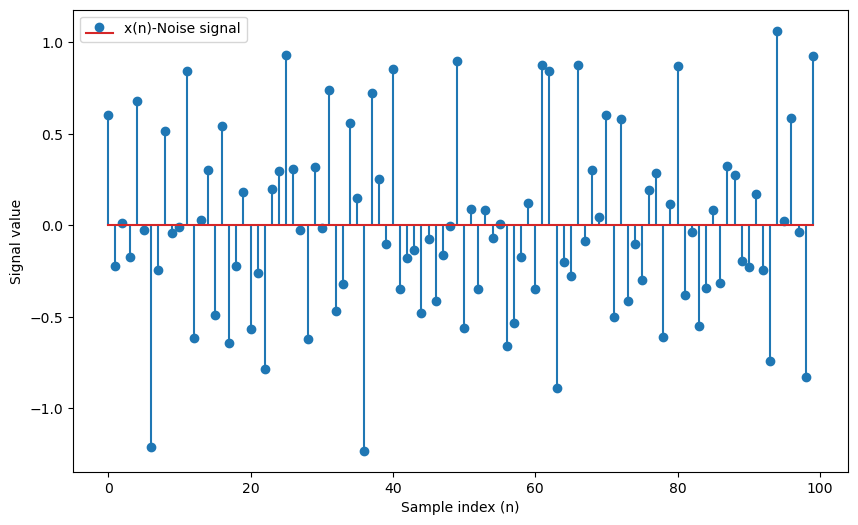

In [4]:
plt.figure(figsize=(10,6))
plt.stem(n, v, label='x(n)-Noise signal')
plt.xlabel('Sample index (n)')
plt.ylabel('Signal value')
plt.legend()
plt.show()

# Noise corrupted signal

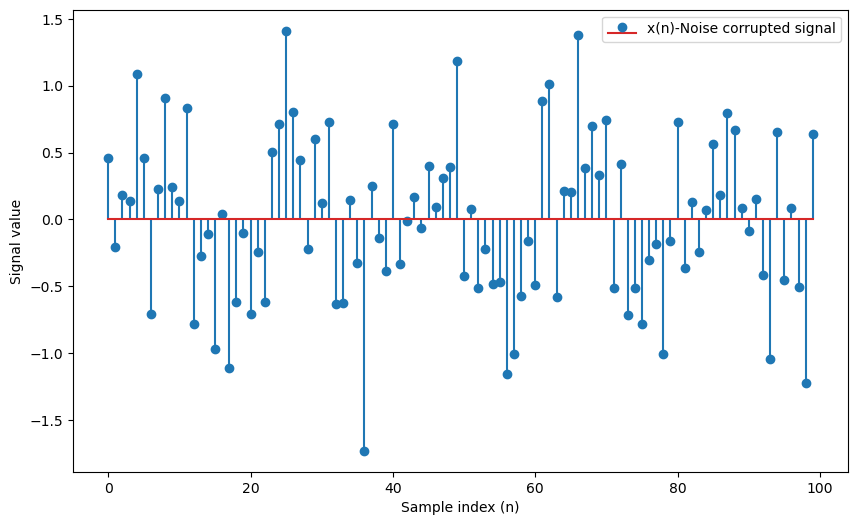

In [5]:
plt.figure(figsize=(10,6))
plt.stem(n, x, label='x(n)-Noise corrupted signal')
plt.xlabel('Sample index (n)')
plt.ylabel('Signal value')
plt.legend()
plt.show()

# Finding Wiener filter coefficients

In [6]:
Mvalues = [10, 15, 20]

for M in Mvalues:
    Rhh = np.zeros((M, M))
    
    for k in range(M):
        for l in range(M):
            Rhh_y = (A**2 / 2) * np.cos(w0 * (k - l))
            
            if k == l:
                Rhh[k, l] = Rhh_y + sigma_v
            else:
                Rhh[k, l] = Rhh_y

    # Cross-correlation vector between observed and original signals
    Rhy_y = (A / 2) * np.cos(w0 * np.arange(M))
    Rhy = Rhy_y.reshape((-1, 1))

    # Wiener filter coefficients
    w = np.linalg.inv(Rhh) @ Rhy
    print(f'Wiener Filter Coefficients for M={M} are {w.T}')


Wiener Filter Coefficients for M=10 are [[ 2.22222222e-01  2.11345893e-01  1.79781554e-01  1.30618945e-01
   6.86704432e-02  3.46944695e-18 -6.86704432e-02 -1.30618945e-01
  -1.79781554e-01 -2.11345893e-01]]
Wiener Filter Coefficients for M=15 are [[ 0.16971123  0.15406838  0.12334424  0.08054632  0.02986395 -0.0237417
  -0.07502335 -0.1189612  -0.15125429 -0.16874156 -0.16971123 -0.15406838
  -0.12334424 -0.08054632 -0.02986395]]
Wiener Filter Coefficients for M=20 are [[ 1.42857143e-01  1.35865217e-01  1.15573856e-01  8.39693218e-02
   4.41452849e-02  3.81639165e-17 -4.41452849e-02 -8.39693218e-02
  -1.15573856e-01 -1.35865217e-01 -1.42857143e-01 -1.35865217e-01
  -1.15573856e-01 -8.39693218e-02 -4.41452849e-02 -3.12250226e-17
   4.41452849e-02  8.39693218e-02  1.15573856e-01  1.35865217e-01]]


# Output of wiener filter

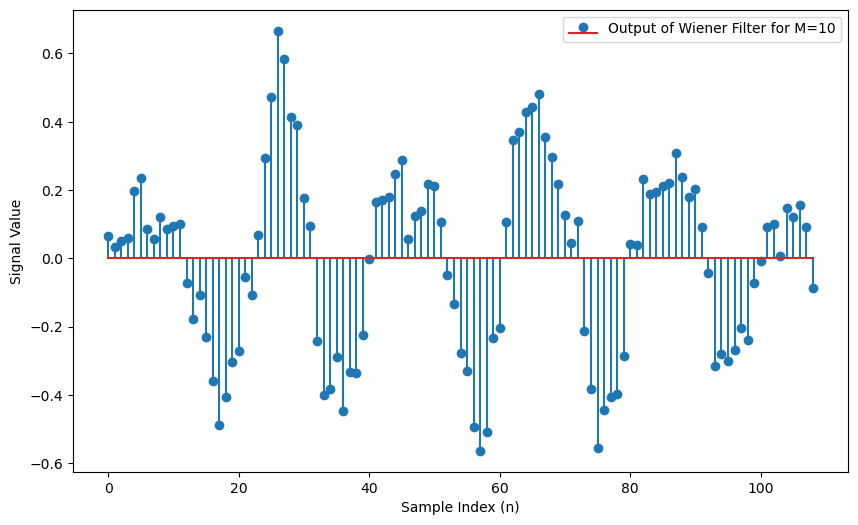

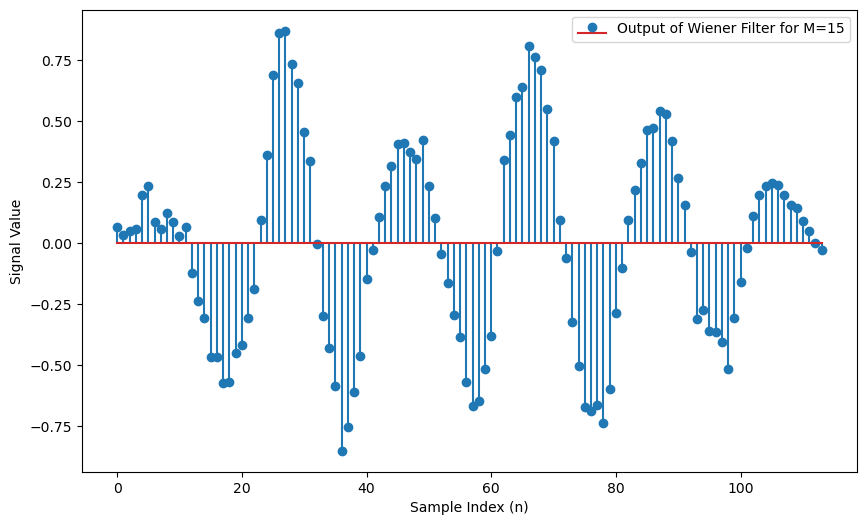

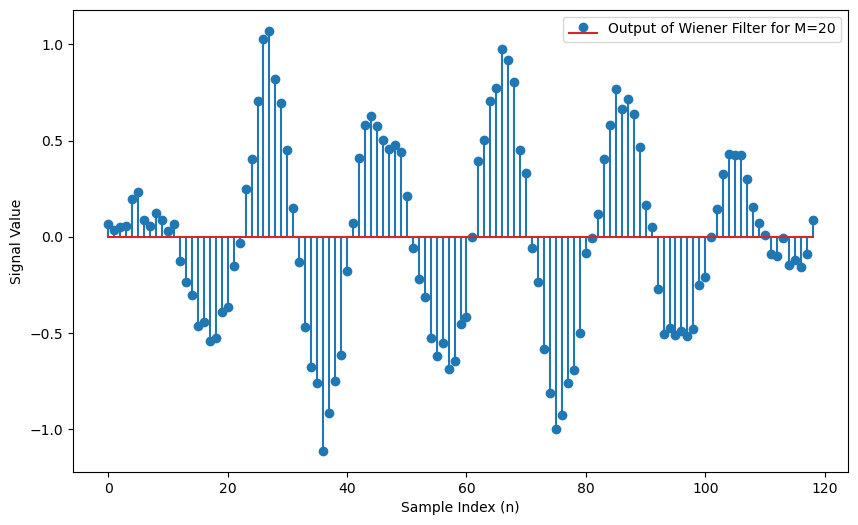

In [7]:
mm = []  # Initialize the list to store MSE values

for M in Mvalues:
    yh = np.zeros(N + M - 1)

    for i in range(N + M - 1):
        for j in range(M):
            if i - j >= 0 and i - j < N:
                yh[i] += w[j] * x[i - j]

    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(N + M - 1), yh, label=f'Output of Wiener Filter for M={M}')
    plt.legend()
    plt.xlabel('Sample Index (n)')
    plt.ylabel('Signal Value')
    plt.show()

    mse = 0

    for i in range(N):
        mse += np.sum((yh[i] - y[i]) ** 2)

    mm.append(mse)

# MSE plot

Mean square Error for M=20 is 5.732967361452291
Mean square Error for M=15 is 3.7596449756644854
Mean square Error for M=10 is 2.6125318068340158


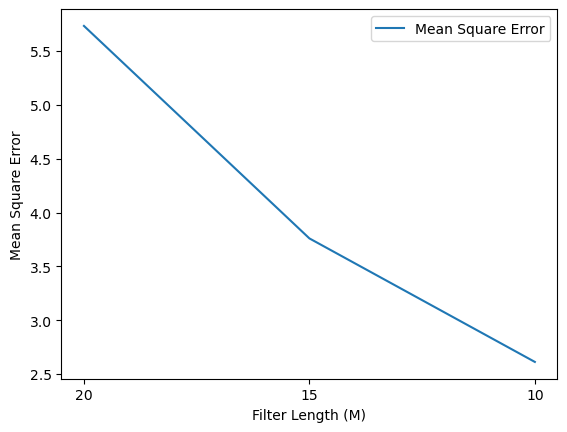

In [9]:
mm = []
Mvalues = [20,15,10]
for M in Mvalues:
    yh = np.zeros(N + M - 1)
    
    for i in range(N + M - 1):
        for j in range(M):
            if i - j >= 0 and i - j < N:
                yh[i] += w[j] * x[i - j]

    mse = 0

    for i in range(N):
        mse += np.sum((yh[i] - y[i]) ** 2)

    print(f'Mean square Error for M={M} is {mse}')
    mm.append(mse)

plt.plot(range(len(Mvalues)), mm, label='Mean Square Error')
plt.xticks(range(len(Mvalues)), Mvalues)
plt.xlabel('Filter Length (M)')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()